In [40]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

In [41]:

import gensim, pickle
from gensim.models.keyedvectors import KeyedVectors
LdaModel = gensim.models.ldamodel.LdaModel


In [42]:
import pandas as pd

### Load word embedding

In [43]:
#ruta_word_embedding = '../data/wiki.multi.en.vec'
#ruta_word_embedding = '../data/embedding_english__europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.bin'
ruta_word_embedding = '../data/embedding_english_europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.model'
wordembedding = gensim.models.Word2Vec.load(ruta_word_embedding)
#wordembedding = KeyedVectors.load_word2vec_format(ruta_word_embedding, binary=False)
#wordembedding = KeyedVectors.load_word2vec_format(ruta_word_embedding, binary=True)

### Load topic modelings

In [45]:
"""
Note: 
LDAvis Scenario:
If you wish to calculate topic similarity metric over one topic modeling output, therefore lda_model_collection_1
and lda_model_collection_2 should be the same. 

Sankey diagram scenario:
If you wish to calculate topic similarity metric over two different topic modeling outputs, lda_model_collection_1
and lda_model_collection_2 should be different


The same shouuld be done with the most relevant documents.
"""



lda_model_collecion_1 = LdaModel.load("../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csv_gensim.model")
lda_model_collecion_2 = LdaModel.load("../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csv_gensim.model")
#lda_model_collecion_2 = LdaModel.load("../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411.csv_gensim.model")

In [46]:
lda_model_collecion_1.show_topics()

[(10,
  '0.051*"good" + 0.037*"read" + 0.036*"make" + 0.026*"great" + 0.021*"interesting" + 0.016*"real" + 0.016*"article" + 0.015*"happen" + 0.014*"lot" + 0.014*"point"'),
 (9,
  '0.043*"social" + 0.041*"medium" + 0.035*"news" + 0.031*"thing" + 0.023*"people" + 0.020*"platform" + 0.019*"stop" + 0.019*"give" + 0.019*"internet" + 0.019*"bad"'),
 (5,
  '0.045*"question" + 0.034*"today" + 0.026*"watch" + 0.024*"time" + 0.022*"talk" + 0.021*"week" + 0.020*"answer" + 0.018*"open" + 0.017*"hear" + 0.016*"day"'),
 (6,
  '0.131*"bigdata" + 0.039*"late" + 0.034*"ai" + 0.033*"analytic" + 0.030*"machinelearne" + 0.030*"technology" + 0.022*"marketing" + 0.020*"tech" + 0.020*"datascience" + 0.017*"learn"'),
 (0,
  '0.055*"people" + 0.035*"delete" + 0.032*"year" + 0.026*"account" + 0.022*"friend" + 0.021*"time" + 0.017*"back" + 0.014*"message" + 0.014*"deletefacebook" + 0.014*"call"'),
 (7,
  '0.049*"facebook" + 0.047*"scandal" + 0.033*"company" + 0.032*"change" + 0.029*"make" + 0.027*"data" + 0.016

In [47]:
lda_model_collecion_2.show_topics()

[(10,
  '0.051*"good" + 0.037*"read" + 0.036*"make" + 0.026*"great" + 0.021*"interesting" + 0.016*"real" + 0.016*"article" + 0.015*"happen" + 0.014*"lot" + 0.014*"point"'),
 (9,
  '0.043*"social" + 0.041*"medium" + 0.035*"news" + 0.031*"thing" + 0.023*"people" + 0.020*"platform" + 0.019*"stop" + 0.019*"give" + 0.019*"internet" + 0.019*"bad"'),
 (5,
  '0.045*"question" + 0.034*"today" + 0.026*"watch" + 0.024*"time" + 0.022*"talk" + 0.021*"week" + 0.020*"answer" + 0.018*"open" + 0.017*"hear" + 0.016*"day"'),
 (6,
  '0.131*"bigdata" + 0.039*"late" + 0.034*"ai" + 0.033*"analytic" + 0.030*"machinelearne" + 0.030*"technology" + 0.022*"marketing" + 0.020*"tech" + 0.020*"datascience" + 0.017*"learn"'),
 (0,
  '0.055*"people" + 0.035*"delete" + 0.032*"year" + 0.026*"account" + 0.022*"friend" + 0.021*"time" + 0.017*"back" + 0.014*"message" + 0.014*"deletefacebook" + 0.014*"call"'),
 (7,
  '0.049*"facebook" + 0.047*"scandal" + 0.033*"company" + 0.032*"change" + 0.029*"make" + 0.027*"data" + 0.016

### Load relevant documents

In [48]:
with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel', 'rb') as f:
    most_relevant_documents_collection_1 = pickle.load(f)
most_relevant_documents_collection_1 = most_relevant_documents_collection_1[['Topic_Num','Topic_Perc_Contrib','text']]

# ../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel
with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel', 'rb') as f:
    most_relevant_documents_collection_2 = pickle.load(f)
most_relevant_documents_collection_2 = most_relevant_documents_collection_2[['Topic_Num','Topic_Perc_Contrib','text']]


In [49]:
most_relevant_documents_collection_1.head()

,Topic_Num,Topic_Perc_Contrib,text
0,0.0,0.2802,.\n#NYCACC\n#DogsOfTwitter\nROCKY\n#ATTENTION\...
1,0.0,0.2776,#NYCACC\n#DogsOfTwitter\nCAPONE #VID\n#ATTENTI...
2,0.0,0.2730,<usernameremoved> I can't wait for the followi...
3,0.0,0.2689,.\n#NYCACC\n#DogsOfTwitter\nATLAS #VID\n#ATTEN...
4,0.0,0.2672,Apparently all my friends are talking about me...


In [50]:
len(most_relevant_documents_collection_1)

1246

In [51]:
most_relevant_documents_collection_2.head()

,Topic_Num,Topic_Perc_Contrib,text
0,0.0,0.2802,.\n#NYCACC\n#DogsOfTwitter\nROCKY\n#ATTENTION\...
1,0.0,0.2776,#NYCACC\n#DogsOfTwitter\nCAPONE #VID\n#ATTENTI...
2,0.0,0.2730,<usernameremoved> I can't wait for the followi...
3,0.0,0.2689,.\n#NYCACC\n#DogsOfTwitter\nATLAS #VID\n#ATTEN...
4,0.0,0.2672,Apparently all my friends are talking about me...


In [52]:
len(most_relevant_documents_collection_2)

1246

### Get prepared data from each collection

In [53]:

with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411_prepared_data_dict_with_more_info', 'rb') as f:
    PreparedData_dict_with_more_info_collection_1 = pickle.load(f)
topic_order_1 = PreparedData_dict_with_more_info_collection_1['topic.order']

In [54]:
PreparedData_dict_with_more_info_collection_1.keys()

dict_keys(['mdsDat', 'tinfo', 'token.table', 'R', 'lambda.step', 'plot.opts', 'topic.order'])

In [55]:
PreparedData_dict_with_more_info_collection_1['mdsDat']

{'x': [0.06561997262644692,
  -0.28382506283890535,
  -0.289401674780925,
  0.21272859106268174,
  0.14102093243196315,
  0.1100277400167304,
  -0.11840074227359862,
  0.0961548131776081,
  -0.022263868897948243,
  0.13520202306311363,
  -0.04686272358716678],
 'y': [0.1128898003397685,
  -0.09882663335825936,
  0.004129310220773565,
  -0.09558681479188345,
  -0.12607354807849241,
  0.12020526372784264,
  -0.1473457220564188,
  -0.017721932508940032,
  -0.08350237935090149,
  -0.06275473678850552,
  0.39458739264501597],
 'topics': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'cluster': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Freq': [9.276300185810001,
  9.145722055493659,
  9.12672005300048,
  9.103953687112721,
  9.084135700940731,
  9.07681839621726,
  9.070171684665636,
  9.052063608257335,
  9.051452269710127,
  9.00923595607245,
  9.003426402719588]}

In [56]:
topic_order_1

[2, 3, 4, 1, 10, 9, 8, 11, 5, 6, 7]

In [57]:

with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411_prepared_data_dict_with_more_info', 'rb') as f:
    PreparedData_dict_with_more_info_collection_2 = pickle.load(f)
topic_order_2 = PreparedData_dict_with_more_info_collection_2['topic.order']

In [58]:
topic_order_2

[2, 3, 4, 1, 10, 9, 8, 11, 5, 6, 7]

In [59]:
PreparedData_dict_with_more_info_collection_2['mdsDat']

{'x': [0.06561997262644692,
  -0.28382506283890535,
  -0.289401674780925,
  0.21272859106268174,
  0.14102093243196315,
  0.1100277400167304,
  -0.11840074227359862,
  0.0961548131776081,
  -0.022263868897948243,
  0.13520202306311363,
  -0.04686272358716678],
 'y': [0.1128898003397685,
  -0.09882663335825936,
  0.004129310220773565,
  -0.09558681479188345,
  -0.12607354807849241,
  0.12020526372784264,
  -0.1473457220564188,
  -0.017721932508940032,
  -0.08350237935090149,
  -0.06275473678850552,
  0.39458739264501597],
 'topics': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'cluster': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Freq': [9.276300185810001,
  9.145722055493659,
  9.12672005300048,
  9.103953687112721,
  9.084135700940731,
  9.07681839621726,
  9.070171684665636,
  9.052063608257335,
  9.051452269710127,
  9.00923595607245,
  9.003426402719588]}

### Add relevance column to each dataframe

In [60]:
relevance_lambda = 0.6 #according to a user study, this is the best value. We can change this!!!


tinfo_collection_1 = pd.DataFrame.from_dict(PreparedData_dict_with_more_info_collection_1['tinfo'])
tinfo_collection_1['relevance'] = relevance_lambda * tinfo_collection_1['logprob']+ (1.00-relevance_lambda)*tinfo_collection_1['loglift']

tinfo_collection_2 = pd.DataFrame.from_dict(PreparedData_dict_with_more_info_collection_2['tinfo'])
tinfo_collection_2['relevance'] = relevance_lambda * tinfo_collection_2['logprob']+ (1.00-relevance_lambda)*tinfo_collection_2['loglift']

In [61]:
tinfo_collection_1.head()

,Category,Freq,Term,Total,loglift,logprob,relevance
0,Default,19023.0,datum,19023.0,30.0,30.0,30.0
1,Default,10705.0,bigdata,10705.0,29.0,29.0,29.0
2,Default,8660.0,privacy,8660.0,28.0,28.0,28.0
3,Default,9296.0,facebook,9296.0,27.0,27.0,27.0
4,Default,6147.0,user,6147.0,26.0,26.0,26.0


In [62]:
tinfo_collection_2.head()

,Category,Freq,Term,Total,loglift,logprob,relevance
0,Default,19023.0,datum,19023.0,30.0,30.0,30.0
1,Default,10705.0,bigdata,10705.0,29.0,29.0,29.0
2,Default,8660.0,privacy,8660.0,28.0,28.0,28.0
3,Default,9296.0,facebook,9296.0,27.0,27.0,27.0
4,Default,6147.0,user,6147.0,26.0,26.0,26.0


In [63]:
# how get terms order by relevance
'''
topic_id = 0
tinfo_collection_1.loc[tinfo_collection_1['Category'] == 'Topic'+str(topic_id+1)].sort_values(by='relevance', ascending=False)[['Term','relevance']][:n_terms]
''';

### Topic similarity metric

In [64]:
import unidecode
import spacy

from string import punctuation
from gensim.utils import simple_preprocess
from string import digits
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = stopwords.words('english')


In [65]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [66]:
'''My own tokenizer '''

punctuation+="¡¿<>'`"
punctuation+='"'

#Remove digits and puntuaction
remove_digits = str.maketrans(digits, ' '*len(digits))#remove_digits = str.maketrans('', '', digits)
remove_punctuation = str.maketrans(punctuation, ' '*len(punctuation))#remove_punctuation = str.maketrans('', '', punctuation)
remove_hashtags_caracter = str.maketrans('#', ' '*len('#'))
#las palabras de los hashtag se mantiene, pero no el simbolo. 

tknzr = TweetTokenizer()
def sent_to_words(sentence):
    return tknzr.tokenize(sentence)
    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    doc = nlp(" ".join(texts)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
        
def text_cleaner(tweet):
    tweet = tweet.translate(remove_digits)
    #tweet = tweet.lower() it wasn't a good idea,, we lost a lot of
    tweet = tweet.translate(remove_punctuation)
    tweet = tweet.translate(remove_hashtags_caracter)
    tweet = tweet.lower()
    tweet = unidecode.unidecode(tweet)
    tweet = sent_to_words(tweet)
    tweet = remove_stopwords(tweet)
    new_tweet  = []
    for elem in tweet:
        if len(elem)>0:
            new_tweet.append(elem[0])
    tweet = lemmatization(new_tweet, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    return tweet[0]




In [67]:
text_cleaner('This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- arrows')

['arrow', 'arrow']

In [68]:
#Note, that vectors are going to be calculated according to topic order of PreparedData

def get_dicts_relevant_keywords_documents(lda_model,df_relevant_documents, n_terms, topic_order, PreparedData_dict_with_more_info):
    num_topics = lda_model.num_topics
    #create dictionary of top keywords 
    topKeywordsDict = {}
    for topic_id in range(num_topics):
        
        topKeywordsDict[topic_id] = []
        
        def save_relevant_keywords_in_dict(row):
            topKeywordsDict[topic_id].append({  #el topic_id, debe ser segun el orden de lda_model
                "term":row['Term'],
                "relevance":row['relevance']
            })
            
        topic_on_tinfo = topic_order.index(topic_id+1)+1    
        PreparedData_dict_with_more_info.loc[PreparedData_dict_with_more_info['Category'] == 'Topic'+str(topic_on_tinfo)].sort_values(by='relevance', ascending=False)[['Term','relevance']][:n_terms].apply(save_relevant_keywords_in_dict, axis=1)    
        
        
            
    #create dictionary of relevant documents
    relevantDocumentsDict = {}
    
    def save_relevant_documents_in_dict(row):
        topic_id = int(row['Topic_Num'])
        if topic_id not in relevantDocumentsDict:
            relevantDocumentsDict[topic_id]=[]
        relevantDocumentsDict[topic_id].append({
            'topic_perc_contrib':row['Topic_Perc_Contrib'],
            'text':row['text']
        })
        return None
    
    df_relevant_documents.apply(save_relevant_documents_in_dict, axis=1)
    
        
    return (topKeywordsDict, relevantDocumentsDict)


def getDocumentVector(text, wordembedding,  topic_id , topic_order, PreparedData_dict_with_more_info):
    #preprocesar    
    #encontrar palabras en word embedding
    #ponderas palabras with relevance metric
    
    topic_on_tinfo = topic_order.index(topic_id+1)+1    
    list_terms_relevance = PreparedData_dict_with_more_info.loc[PreparedData_dict_with_more_info['Category'] == 'Topic'+str(topic_on_tinfo)].sort_values(by='relevance', ascending=False)['Term'].tolist()
    document_vector = 0.0
    words_found = set()
    for word in text_cleaner(text):    
        if word in list_terms_relevance:
            raking_word = float(list_terms_relevance.index(word)+1)
            if word in wordembedding.wv:
                #print("WORD FOUND", word)
                document_vector+=wordembedding.wv[word]/raking_word #aqui hay que ponderar
                words_found.add(word.upper())
            else:
                print("WARNING, Word not found:", word)
        #else:
        #    print("not found word", word.upper(), "for document:",text_cleaner(text))
    #print("words found", words_found)
    return document_vector


        
    
def get_topkeywords_relevantdocuments_vectors(wordembedding, lda_model,most_relevant_documents,  n_terms, topic_order, PreparedData_dict_with_more_info, topkdocuments): #n_terms : numero de top keywords a considerar
    topKeywordsDict, relevantDocumentsDict = get_dicts_relevant_keywords_documents(lda_model, most_relevant_documents, n_terms, topic_order,  PreparedData_dict_with_more_info)

    ##Create top keyword vector per topic
    topkeywords_vectors_dict = {}
    num_topics = lda_model.num_topics
    for topic_id in range(num_topics):
        topkeywords_vector = 0
        ranking = 1.0
        for item in topKeywordsDict[topic_id]:
            if item['term'] in wordembedding.wv: 
                topkeywords_vector += wordembedding.wv[item['term']]/ranking
            else:
                print("WARNING NOT FOUND: ", item['term']," position:",ranking)
            ranking+=1
        topkeywords_vectors_dict[topic_id] = topkeywords_vector
        
    #Create a top relevant document vector    
    relevantdocuments_vectors_dict = {}
    for topic_id in range(num_topics):
        relevantDocumentsvector = 0.0
        j = 0
        for item in relevantDocumentsDict[topic_id][0:topkdocuments]: #we consider only the most k documents.             
            j+=1                                            
            relevantDocumentsvector+= float(item['topic_perc_contrib'])*getDocumentVector(item['text'], wordembedding, topic_id, topic_order, PreparedData_dict_with_more_info) #PODRIA HACER UNA ESPECIE DE RANKING, SIMILAR A LO QUE HICE CON LAS TOP KEYWORDS.
        relevantdocuments_vectors_dict[topic_id] = relevantDocumentsvector
        
    return (topkeywords_vectors_dict, relevantdocuments_vectors_dict)


In [69]:
#Here, we calculate once the topkeywords_vector and the relevant documents_vector for each topic
#We are going to calculate several times:      #final topic vector = (lambda)topic_keyword_vector + (lambda-1)topic_document_vector
#because we are going to try different lambda (between 0 and 1)
def get_topic_vectors(wordembedding, lda_model,most_relevant_documents,  n_terms, lambda_, topic_order, PreparedData_dict_with_more_info, topkdocuments):
    num_topics = lda_model.num_topics
    topkeywords_vectors_dict, relevantdocuments_vectors_dict = get_topkeywords_relevantdocuments_vectors(wordembedding, lda_model,most_relevant_documents,  n_terms, topic_order, PreparedData_dict_with_more_info, topkdocuments)
    final_topic_vectors_dict = dict()
    for topic_id in range(num_topics):
        final_topic_vector = lambda_*topkeywords_vectors_dict[topic_id]+(1-lambda_)*relevantdocuments_vectors_dict[topic_id]
        final_topic_vectors_dict[topic_id] = final_topic_vector
    return final_topic_vectors_dict

In [70]:
#This matrix is calculated by a specific lambda. 
def get_matrix(wordembedding, lda_model_1,most_relevant_documents_1,lda_model_2,most_relevant_documents_2, n_terms, lambda_, topic_order_1, topic_order_2, PreparedData_dict_with_more_info_1, PreparedData_dict_with_more_info_2, topkdocuments):
    
    #final topic vector = (lambda)topic_keyword_vector + (lambda-1)topic_document_vector
    final_topic_vectors_dict_1 =  get_topic_vectors(wordembedding, lda_model_1,most_relevant_documents_1,  n_terms, lambda_, topic_order_1, PreparedData_dict_with_more_info_1, topkdocuments)
    final_topic_vectors_dict_2 =  get_topic_vectors(wordembedding, lda_model_2,most_relevant_documents_2,  n_terms, lambda_, topic_order_2,  PreparedData_dict_with_more_info_2, topkdocuments)
    
    topic_similarity_matrix = []
    for i in range(lda_model_1.num_topics):
        row = []
        for j in range(lda_model_2.num_topics):
            topic_i = final_topic_vectors_dict_1[i].reshape(1,-1)
            topic_j = final_topic_vectors_dict_2[j].reshape(1,-1)
            row.append(float(cosine_similarity(topic_i,topic_j)))
            #print(i,j,float(cosine_similarity(topic_i,topic_j)))
        topic_similarity_matrix.append(row)
    topic_similarity_matrix= np.asarray(topic_similarity_matrix)
    return topic_similarity_matrix

In [71]:
topn = 20
topkdocuments = 20
#lambda_ = 0.8


#i = 0.0
i = 0.0
matrices_dict = dict()
while i <=1.01:
    lambda_ = round(i*100/100,2)
    print(lambda_)
    matrix = get_matrix(wordembedding, lda_model_collecion_1, most_relevant_documents_collection_1, lda_model_collecion_2, most_relevant_documents_collection_2,topn, lambda_, topic_order_1, topic_order_2, tinfo_collection_1, tinfo_collection_2, topkdocuments)
    matrices_dict[lambda_] = matrix
    i+=0.01
 

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0


In [72]:
with open('../data/cambridge_analytica/regional_datasets/matrix_europe_vs_europe_own_wordembedding_final', 'wb') as f:
            pickle.dump(matrices_dict, f)

In [32]:
'''
with open('../data/cambridge_analytica/regional_datasets/matrix_europe_vs_northamerica_own_wordembedding_final', 'wb') as f:
            pickle.dump(matrices_dict, f)
''';

### Testing

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


In [74]:
print(topic_order_1)
print(topic_order_2)

[2, 3, 4, 1, 10, 9, 8, 11, 5, 6, 7]
[2, 3, 4, 1, 10, 9, 8, 11, 5, 6, 7]


<AxesSubplot:>

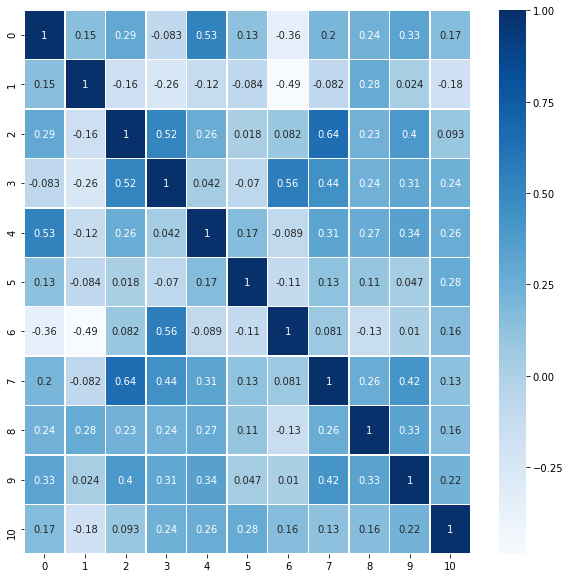

In [77]:

fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(matrices_dict[1.0], annot=True, cmap='Blues', linewidths=.5, ax=ax)

In [70]:
'''
with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel', 'rb') as f:
    most_relevant_documents_collection_1 = pickle.load(f)
#most_relevant_documents_collection_1 = most_relevant_documents_collection_1[['Topic_Num','Topic_Perc_Contrib','text']]
most_relevant_documents_collection_1.to_csv('borrar_review_delete.csv')
''';